In [66]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('../../Data/hurto_a_residencia.csv')
df.head()

,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,grupo_actor,actividad_delictiva,parentesco,...,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida,fecha_ingestion
0,2017-01-01T13:51:00.000-05:00,1.0,6.251238,-75.586712,Mujer,38,Casado(a),Sin dato,Sin dato,Sin dato,...,"Hotel, motel y hostal",Laureles,Accesorios prendas de vestir,Prendas de vestir y accesorios,Mercancía,-1,Oro,Sin dato,Sin dato,2024-10-06T04:04:48.000-05:00
1,2017-01-01T13:51:00.000-05:00,1.0,6.251238,-75.586712,Mujer,38,Casado(a),Sin dato,Sin dato,Sin dato,...,"Hotel, motel y hostal",Laureles,Electrodoméstico video y audio y accesorios,Electrodomésticos,Mercancía,-1,Negro,Sin dato,Sin dato,2024-10-06T04:04:48.000-05:00
2,2017-01-01T13:51:00.000-05:00,1.0,6.251238,-75.586712,Mujer,38,Casado(a),Sin dato,Sin dato,Sin dato,...,"Hotel, motel y hostal",Laureles,Celular,Tecnología,Mercancía,-1,Negro,Sin dato,Sin dato,2024-10-06T04:04:48.000-05:00
3,2017-01-01T00:00:00.000-05:00,1.0,6.262758,-75.593850,Hombre,62,Soltero(a),Sin dato,Sin dato,Sin dato,...,"Hotel, motel y hostal",Laureles,Bicicleta,Vehículos de 2 o 4 ruedas,Vehículo,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:04:48.000-05:00
4,2017-01-01T00:00:00.000-05:00,1.0,6.280006,-75.564721,Mujer,53,Soltero(a),Sin dato,Sin dato,Sin dato,...,"Hotel, motel y hostal",Aranjuez,Peso,"Dinero, joyas, piedras preciosas y título valor",Mercancía,-1,Sin dato,Sin dato,Sin dato,2024-10-06T04:04:48.000-05:00


In [76]:
def theJson(df, col, filterr, variables, columnasdrop, bandera, name):
    # take the variables of the dataframe that we want
    if filterr == 1:
        df = df[df[col].isin(variables)].reset_index(drop=True)

    # take off the columns of the dataframe that we want, with the columnsdrop list
    dfnew = df.drop(columnasdrop, axis=1)
    dfnew.reset_index(drop=True, inplace=True)

    # make the values the column of districts are intergers
    dfnew['codigo_comuna'] = pd.to_numeric(df['codigo_comuna'], errors='coerce').fillna(0).astype('int64')
    
    # change the type of the column fecha_hecho to datetime
    dfnew['fecha_hecho'] = pd.to_datetime(dfnew['fecha_hecho']).dt.year
    dfnew['fecha_hecho'] = pd.to_datetime(dfnew['fecha_hecho'], format='%Y')
    dfnew = dfnew[["fecha_hecho","codigo_comuna"]].value_counts().reset_index().sort_values(by = 'codigo_comuna')
    dfnew.rename({0 : 'Total'}, axis=1, inplace=True)    

    # take de geojson file of the medellin districts
    geo_df = gpd.read_file("comunas_y_corregimientos.geojson")
    geo_df = geo_df.drop([19,21],axis = 0)
    geo_df = geo_df.astype({"codigo":"int64"})
    geo_df.rename({'codigo' : 'codigo_comuna'}, axis=1, inplace=True)

    total = geo_df.merge(dfnew, on='codigo_comuna')

    if bandera == 1:
        total.to_file(name, driver='GeoJSON')
    
    return total

In [78]:
col = 'lugar'
filterr = 1
columnasdrop = ['cantidad', 'latitud', 'longitud', 'sexo', 'edad',\
                'estado_civil', 'grupo_actor', 'actividad_delictiva', 'parentesco',\
                'ocupacion', 'discapacidad', 'grupo_especial', 'medio_transporte',\
                'nivel_academico', 'testigo', 'conducta', 'modalidad',\
                'caracterizacion', 'conducta_especial', 'arma_medio', 'articulo_penal',\
                'categoria_penal', 'nombre_barrio', 'codigo_barrio',\
                'lugar', 'sede_receptora', 'bien', 'categoria_bien', 'grupo_bien',\
                'modelo', 'color', 'permiso', 'unidad_medida', 'fecha_ingestion']
variables = ['Hotel, motel y hostal', 'Residencia', 'Finca', 'Casa o apartamento',\
            'Conjunto residencial', 'Oficina', 'Cajero electrónico']
bandera = 0
name = 'hurtoResidencias.json'
total = theJson(df, col, filterr, variables, columnasdrop, bandera, name)

In [81]:
total

,OBJECTID,codigo_comuna,nombre,identificacion,limitemunicipioid,subtipo_comunacorregimiento,fecha_actualizacion,Shape_Length,Shape_Area,geometry,fecha_hecho,Total
0,1,1,Popular,Comuna 1,001,1,1418774400000,9604.447484,3.097941e+06,"POLYGON ((4718193.072 2255308.014, 4718182.769...",2020-01-01,76
1,1,1,Popular,Comuna 1,001,1,1418774400000,9604.447484,3.097941e+06,"POLYGON ((4718193.072 2255308.014, 4718182.769...",2016-01-01,33
2,1,1,Popular,Comuna 1,001,1,1418774400000,9604.447484,3.097941e+06,"POLYGON ((4718193.072 2255308.014, 4718182.769...",2021-01-01,66
3,1,1,Popular,Comuna 1,001,1,1418774400000,9604.447484,3.097941e+06,"POLYGON ((4718193.072 2255308.014, 4718182.769...",2008-01-01,64
4,1,1,Popular,Comuna 1,001,1,1418774400000,9604.447484,3.097941e+06,"POLYGON ((4718193.072 2255308.014, 4718182.769...",2019-01-01,80
...,...,...,...,...,...,...,...,...,...,...,...,...
400,23,15,Guayabal,Comuna 15,001,1,1418774400000,13279.241953,7.288421e+06,"POLYGON ((4713505.791 2243146.678, 4713505.99 ...",2006-01-01,8
401,23,15,Guayabal,Comuna 15,001,1,1418774400000,13279.241953,7.288421e+06,"POLYGON ((4713505.791 2243146.678, 4713505.99 ...",2023-01-01,24
402,23,15,Guayabal,Comuna 15,001,1,1418774400000,13279.241953,7.288421e+06,"POLYGON ((4713505.791 2243146.678, 4713505.99 ...",2015-01-01,74
403,23,15,Guayabal,Comuna 15,001,1,1418774400000,13279.241953,7.288421e+06,"POLYGON ((4713505.791 2243146.678, 4713505.99 ...",2022-01-01,32


In [9]:
df['codigo_comuna'] = df['codigo_comuna'].replace('SIN DATO', np.nan)
df.dropna(subset='codigo_comuna',inplace=True)

In [10]:
df.columns

Index(['fecha_hecho', 'cantidad', 'latitud', 'longitud', 'sexo', 'edad',
       'estado_civil', 'grupo_actor', 'actividad_delictiva', 'parentesco',
       'ocupacion', 'discapacidad', 'grupo_especial', 'medio_transporte',
       'nivel_academico', 'testigo', 'conducta', 'modalidad',
       'caracterizacion', 'conducta_especial', 'arma_medio', 'articulo_penal',
       'categoria_penal', 'nombre_barrio', 'codigo_barrio', 'codigo_comuna',
       'lugar', 'sede_receptora', 'bien', 'categoria_bien', 'grupo_bien',
       'modelo', 'color', 'permiso', 'unidad_medida', 'fecha_ingestion'],
      dtype='object')

In [11]:
df['fecha_hecho'] = pd.to_datetime(df['fecha_hecho']).dt.year

In [12]:
df['codigo_comuna']

0        11
1        11
2        11
3        11
4         4
         ..
42637    12
42639     8
42650     6
42652    12
42669    15
Name: codigo_comuna, Length: 42226, dtype: object

In [13]:
# esto es el total de capturas por columna a lo largo de 2017 a 2023
df = df.astype({'codigo_comuna': int})
homicidio_comuna = [len(df[df['codigo_comuna'] == i]) for i in df['codigo_comuna'].unique()]
homicidio_comuna[:10], df['codigo_comuna'].unique()[:10]

([6215, 1598, 2908, 5967, 609, 5681, 2451, 1300, 1444, 1278],
 array([11,  4, 10, 14, 90, 16,  7, 15,  5,  3]))

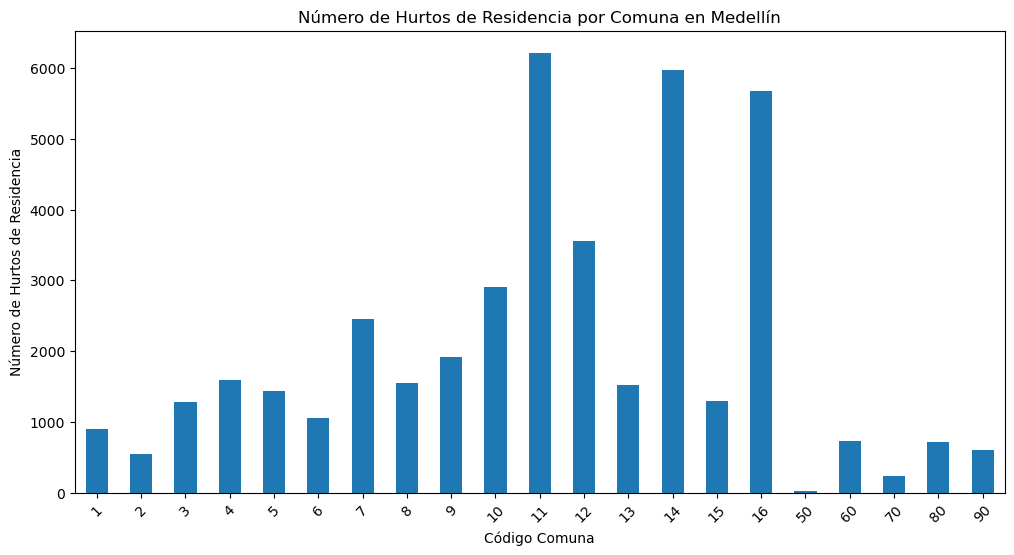

In [14]:
# Create a histogram showing the number of captures for each comuna
# Group by 'codigo_comuna' and count the occurrences
comuna_counts = df['codigo_comuna'].value_counts().sort_index()

# Plotting the histogram
plt.figure(figsize=(12, 6))
comuna_counts.plot(kind='bar')
plt.xlabel("Código Comuna")
plt.ylabel("Número de Hurtos de Residencia")
plt.title("Número de Hurtos de Residencia por Comuna en Medellín")
plt.xticks(rotation=45)
plt.show()


In [15]:
def Hurto_resi_ano(df, i):
    """
    generar un histograma que muestre el número de homicidios por año para una comuna específica
    """
    # Filter data for comuna 6
    comuna = df[df['codigo_comuna'] == i]

    # Convert 'fecha_hecho' column to datetime format for proper time series analysis

    # Extract year from the 'fecha_hecho' column and count captures by year
    comuna['year'] = df['fecha_hecho']
    hurto_by_year = comuna['year'].value_counts().sort_index()

    # Plotting the histogram
    plt.figure(figsize=(10, 6))
    hurto_by_year.plot(kind='bar')
    plt.xlabel("Año")
    plt.ylabel("Número de Hurtos a Residencias")
    plt.title(f"Número de Hurtos a Residencias por Año en la Comuna {i}")
    plt.xticks(rotation=45)
    plt.show()


/tmp/ipykernel_5504/1363687168.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comuna['year'] = df['fecha_hecho']


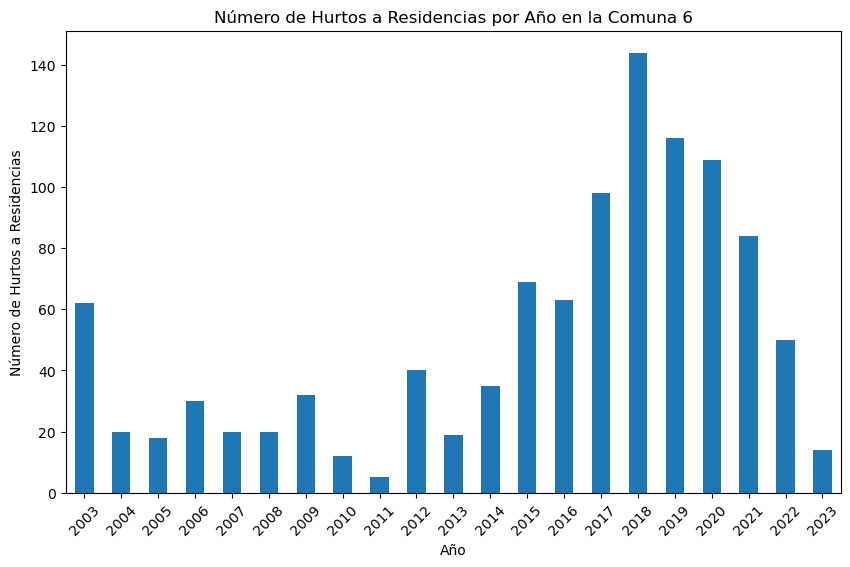

In [16]:
Hurto_resi_ano(df, 6)